## 📌 Project Task 4 : Customer Churn Analysis

The objective of this project is to analyze customer churn for a telecom company and build predictive models to identify customers who are likely to leave the service.

### Tasks Performed:

### 1. Data Manipulation
- Extract specific columns from the dataset for focused analysis
- Filter customers based on:
  - Gender, senior citizen status, and payment method
  - Tenure and monthly charges
  - Contract type, payment method, and churn status
- Randomly sample customer records for analysis
- Analyze churn distribution across customers

### 2. Data Visualization
- Create visual insights using plots to understand customer behavior:
  - Bar plot for Internet Service distribution
  - Histogram to analyze customer tenure
  - Scatter plot between Monthly Charges and Tenure
  - Box plot comparing Tenure across Contract types

### 3. Linear Regression
- Build a regression model to predict **Monthly Charges** based on **Tenure**
- Split data into training and testing sets
- Evaluate model performance using **Root Mean Square Error (RMSE)**

### 4. Logistic Regression
- Build classification models to predict **Customer Churn**
- Implement:
  - Simple logistic regression using Monthly Charges
  - Multiple logistic regression using Tenure and Monthly Charges
- Evaluate models using **confusion matrix** and **accuracy score**

### 5. Decision Tree Model
- Build a decision tree classifier to predict churn using customer tenure
- Evaluate performance using accuracy and confusion matrix

### 6. Random Forest Model
- Build a Random Forest classifier using Tenure and Monthly Charges
- Compare performance with other models using accuracy metrics

### Tools & Technologies:
- Python
- Pandas
- Matplotlib / Seaborn
- Scikit-learn


In [28]:
# ==============================
# IMPORTING REQUIRED LIBRARIES
# ==============================

# pandas and numpy are used for data handling and numerical operations
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn contains machine learning algorithms and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

# Ignore warnings to keep output clean and readable
import warnings
warnings.filterwarnings("ignore")


In [29]:
# ==============================
# LOADING THE DATASET
# ==============================

# Read the customer churn CSV file into a DataFrame
df = pd.read_csv("C:/Users/ASUS/Downloads/customer_churn.csv")

# Display first 5 rows to understand the structure of data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
# ==============================
# UNDERSTANDING THE DATA
# ==============================

# Check number of rows and columns
df.shape

# Display column names
df.columns

# Get detailed information about data types and null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
# Extract the 5th column using index-based selection
# iloc[:, 4] means "all rows, column at index 4"
customer_5 = df.iloc[:, 4]

# Display first few values
customer_5.head()


0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [32]:
# Extract the 15th column using index-based selection
customer_15 = df.iloc[:, 14]

# Display first few values
customer_15.head()


0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [33]:
# Filter customers who satisfy ALL conditions:
# 1. Gender is Male
# 2. SeniorCitizen value is 1 (Yes)
# 3. Payment method is Electronic check

senior_male_electronic = df[
    (df["gender"] == "Male") &
    (df["SeniorCitizen"] == 1) &
    (df["PaymentMethod"] == "Electronic check")
]

# Display filtered result
senior_male_electronic.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [34]:
# Select customers who satisfy AT LEAST ONE condition:
# Either tenure is greater than 70 months
# OR monthly charges are more than $100

customer_total_tenure = df[
    (df["tenure"] > 70) | (df["MonthlyCharges"] > 100)
]

# Preview the result
customer_total_tenure.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [35]:
# Filter customers with:
# Contract = Two year
# Payment Method = Mailed check
# Churn = Yes

two_mail_yes = df[
    (df["Contract"] == "Two year") &
    (df["PaymentMethod"] == "Mailed check") &
    (df["Churn"] == "Yes")
]

# Display result
two_mail_yes.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [36]:
# Randomly sample 333 records from the dataset
# random_state ensures same output every time the code runs

customer_333 = df.sample(n=333, random_state=42)

# Preview sample
customer_333.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


In [37]:
# Count number of customers who churned and who did not
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

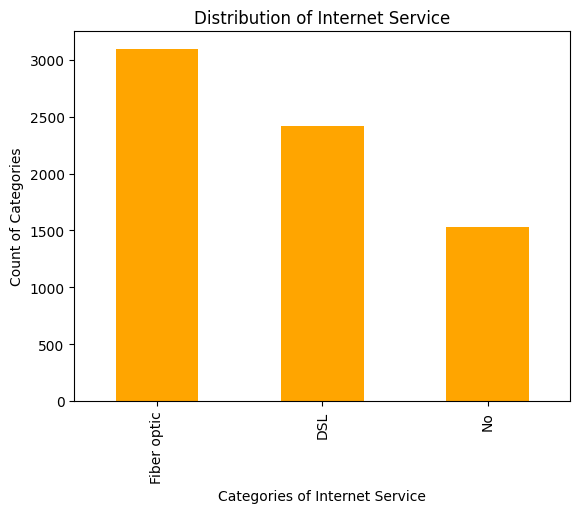

In [38]:
# Create a bar plot showing distribution of InternetService categories

df["InternetService"].value_counts().plot(
    kind="bar",
    color="orange"
)

# Label axes and title
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")

# Display plot
plt.show()


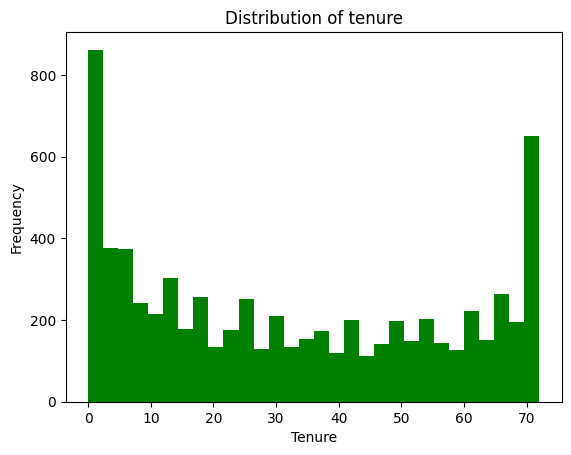

In [39]:
# Create histogram to understand tenure distribution

plt.hist(df["tenure"], bins=30, color="green")

# Add title and labels
plt.title("Distribution of tenure")
plt.xlabel("Tenure")
plt.ylabel("Frequency")

plt.show()


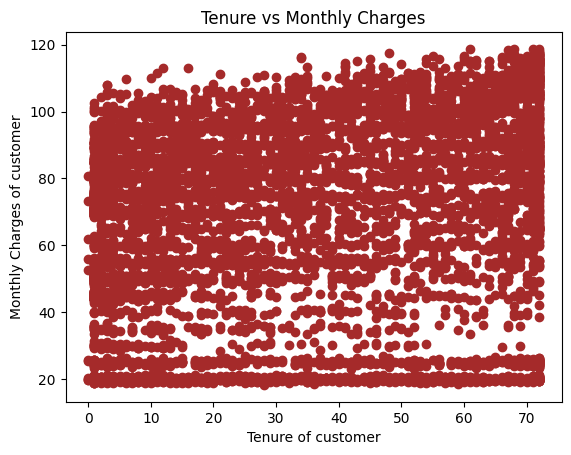

In [40]:
# Scatter plot to visualize relationship between tenure and monthly charges

plt.scatter(df["tenure"], df["MonthlyCharges"], color="brown")

# Add labels and title
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")

plt.show()


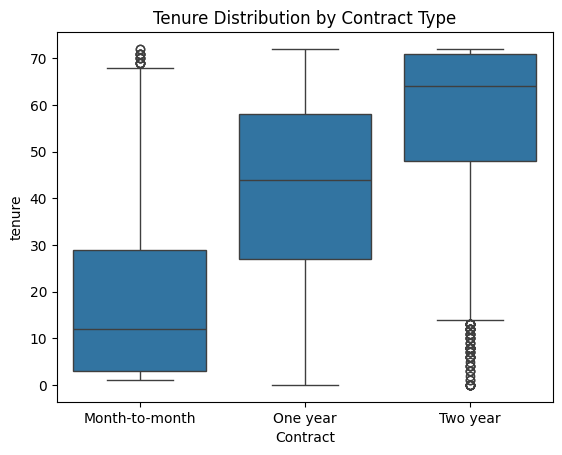

In [41]:
# Box plot to compare tenure across different contract types

sns.boxplot(x="Contract", y="tenure", data=df)

plt.title("Tenure Distribution by Contract Type")
plt.show()


In [42]:
# ==============================
# LINEAR REGRESSION MODEL
# ==============================

# Independent variable (tenure)
X = df[["tenure"]]

# Dependent variable (MonthlyCharges)
y = df["MonthlyCharges"]

# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict values on test data
y_pred = lr.predict(X_test)

# Calculate prediction error
error = y_test - y_pred

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse


29.07936015646814

In [43]:
# Convert Churn values from Yes/No to 1/0
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [44]:
# Independent variable
X = df[["MonthlyCharges"]]

# Target variable
y = df["Churn"]

# Split dataset (65% train, 35% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42
)

# Create logistic regression model
log_model = LogisticRegression()

# Train model
log_model.fit(X_train, y_train)

# Predict churn
y_pred = log_model.predict(X_test)

# Confusion matrix and accuracy
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)


0.7287104622871047

In [45]:
# Independent variables
X = df[["tenure", "MonthlyCharges"]]
y = df["Churn"]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
log_model.fit(X_train, y_train)

# Predict results
y_pred = log_model.predict(X_test)

# Evaluate model
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)


0.7977288857345636

In [46]:
# Independent variable
X = df[["tenure"]]
y = df["Churn"]

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create decision tree model
dt = DecisionTreeClassifier()

# Train model
dt.fit(X_train, y_train)

# Predict churn
y_pred = dt.predict(X_test)

# Evaluate model
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)


0.7572746628814763

In [47]:
# Independent variables
X = df[["tenure", "MonthlyCharges"]]
y = df["Churn"]

# Train-test split (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create Random Forest model with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# Train model
rf.fit(X_train, y_train)

# Predict churn
y_pred = rf.predict(X_test)

# Evaluate performance
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)


0.7529578797917653